In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 程式介紹_外匯近一個月走勢-sklearn-linear
利用政府公開資訊網來看外匯的預測是否準確

## 讀入資料

In [2]:
df=pd.read_csv("https://quality.data.gov.tw/dq_download_csv.php?nid=11339&md5_url=f2fdbc21603c55b11aead08c84184b8f")

In [16]:
df.columns

Index(['日期', '美元／新台幣', '人民幣／新台幣', '歐元／美元', '美元／日幣', '英鎊／美元', '澳幣／美元', '美元／港幣',
       '美元／人民幣', '美元／南非幣', '紐幣／美元'],
      dtype='object')

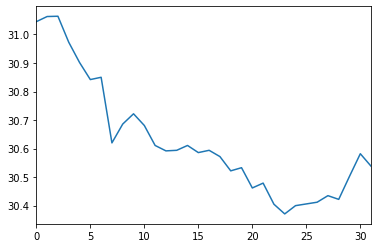

In [17]:
df['美元／新台幣'].plotot()

In [43]:
df.head()

,日期,美元／新台幣,人民幣／新台幣,歐元／美元,美元／日幣,英鎊／美元,澳幣／美元,美元／港幣,美元／人民幣,美元／南非幣,紐幣／美元
0,2019/10/1,31.045,4.339594,1.08860,108.390,1.22810,0.66945,7.84145,7.1539,15.22970,0.62215
1,2019/10/2,31.063,4.342763,1.09135,107.715,1.22760,0.66950,7.84010,7.1528,15.38590,0.62440
2,2019/10/3,31.064,4.350451,1.09460,107.245,1.22910,0.67115,7.84200,7.1404,15.16705,0.62695
3,2019/10/4,30.973,4.345822,1.09710,106.775,1.23335,0.67545,7.84290,7.1271,15.16805,0.63220
4,2019/10/7,30.902,4.332924,1.09670,106.845,1.22970,0.67425,7.84415,7.1319,15.12810,0.63050


## 開始預測

In [61]:
x=df["美元／新台幣"][0:31].values
y=df["美元／新台幣"][1:32].values

In [62]:
x=x.reshape(31,1)
y=y.reshape(31,1)

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model=LinearRegression()

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=9)

In [65]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
y_predict=model.predict(x_test)

## 預測結果和實際結果之比對

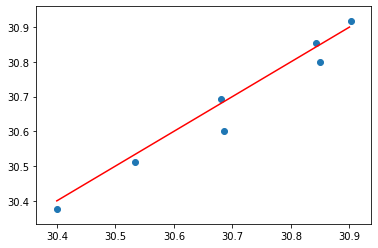

In [72]:
plt.scatter(y_test,y_predict)
plt.plot([30.4,30.9],[30.4,30.9],'r')